# Lab 2: Modeling

Some usefull links:

1. Python: https://www.python.org/downloads/

2. pip: 
    https://realpython.com/what-is-pip/ , 
    https://pip.pypa.io/en/stable/installation/ , 
    https://pip.pypa.io/en/stable/cli/pip_list/ 

3. Jupyter notebook: https://jupyter.org
       
4. Anaconda: https://www.anaconda.com/products/individual

5. vscode <> jupyter notebook: https://code.visualstudio.com/docs/datascience/jupyter-notebooks
---

Libraries: 

- Numpy https://numpy.org 
- Pandas https://pandas.pydata.org 
- Scikit-learn https://scikit-learn.org/stable/ 
- matplotlib https://matplotlib.org 
- plotly https://plotly.com/python/


## General imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Class imbalance

Load dataset

Homes in NYC and SF dataset: https://github.com/jadeyee/r2d3-part-1-data/blob/master/part_1_data.csv

In [2]:
data = pd.read_csv('r2d3_homes_nyc_sf.csv')
data.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   in_sf           492 non-null    int64  
 1   beds            492 non-null    float64
 2   bath            492 non-null    float64
 3   price           492 non-null    int64  
 4   year_built      492 non-null    int64  
 5   sqft            492 non-null    int64  
 6   price_per_sqft  492 non-null    int64  
 7   elevation       492 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 30.9 KB


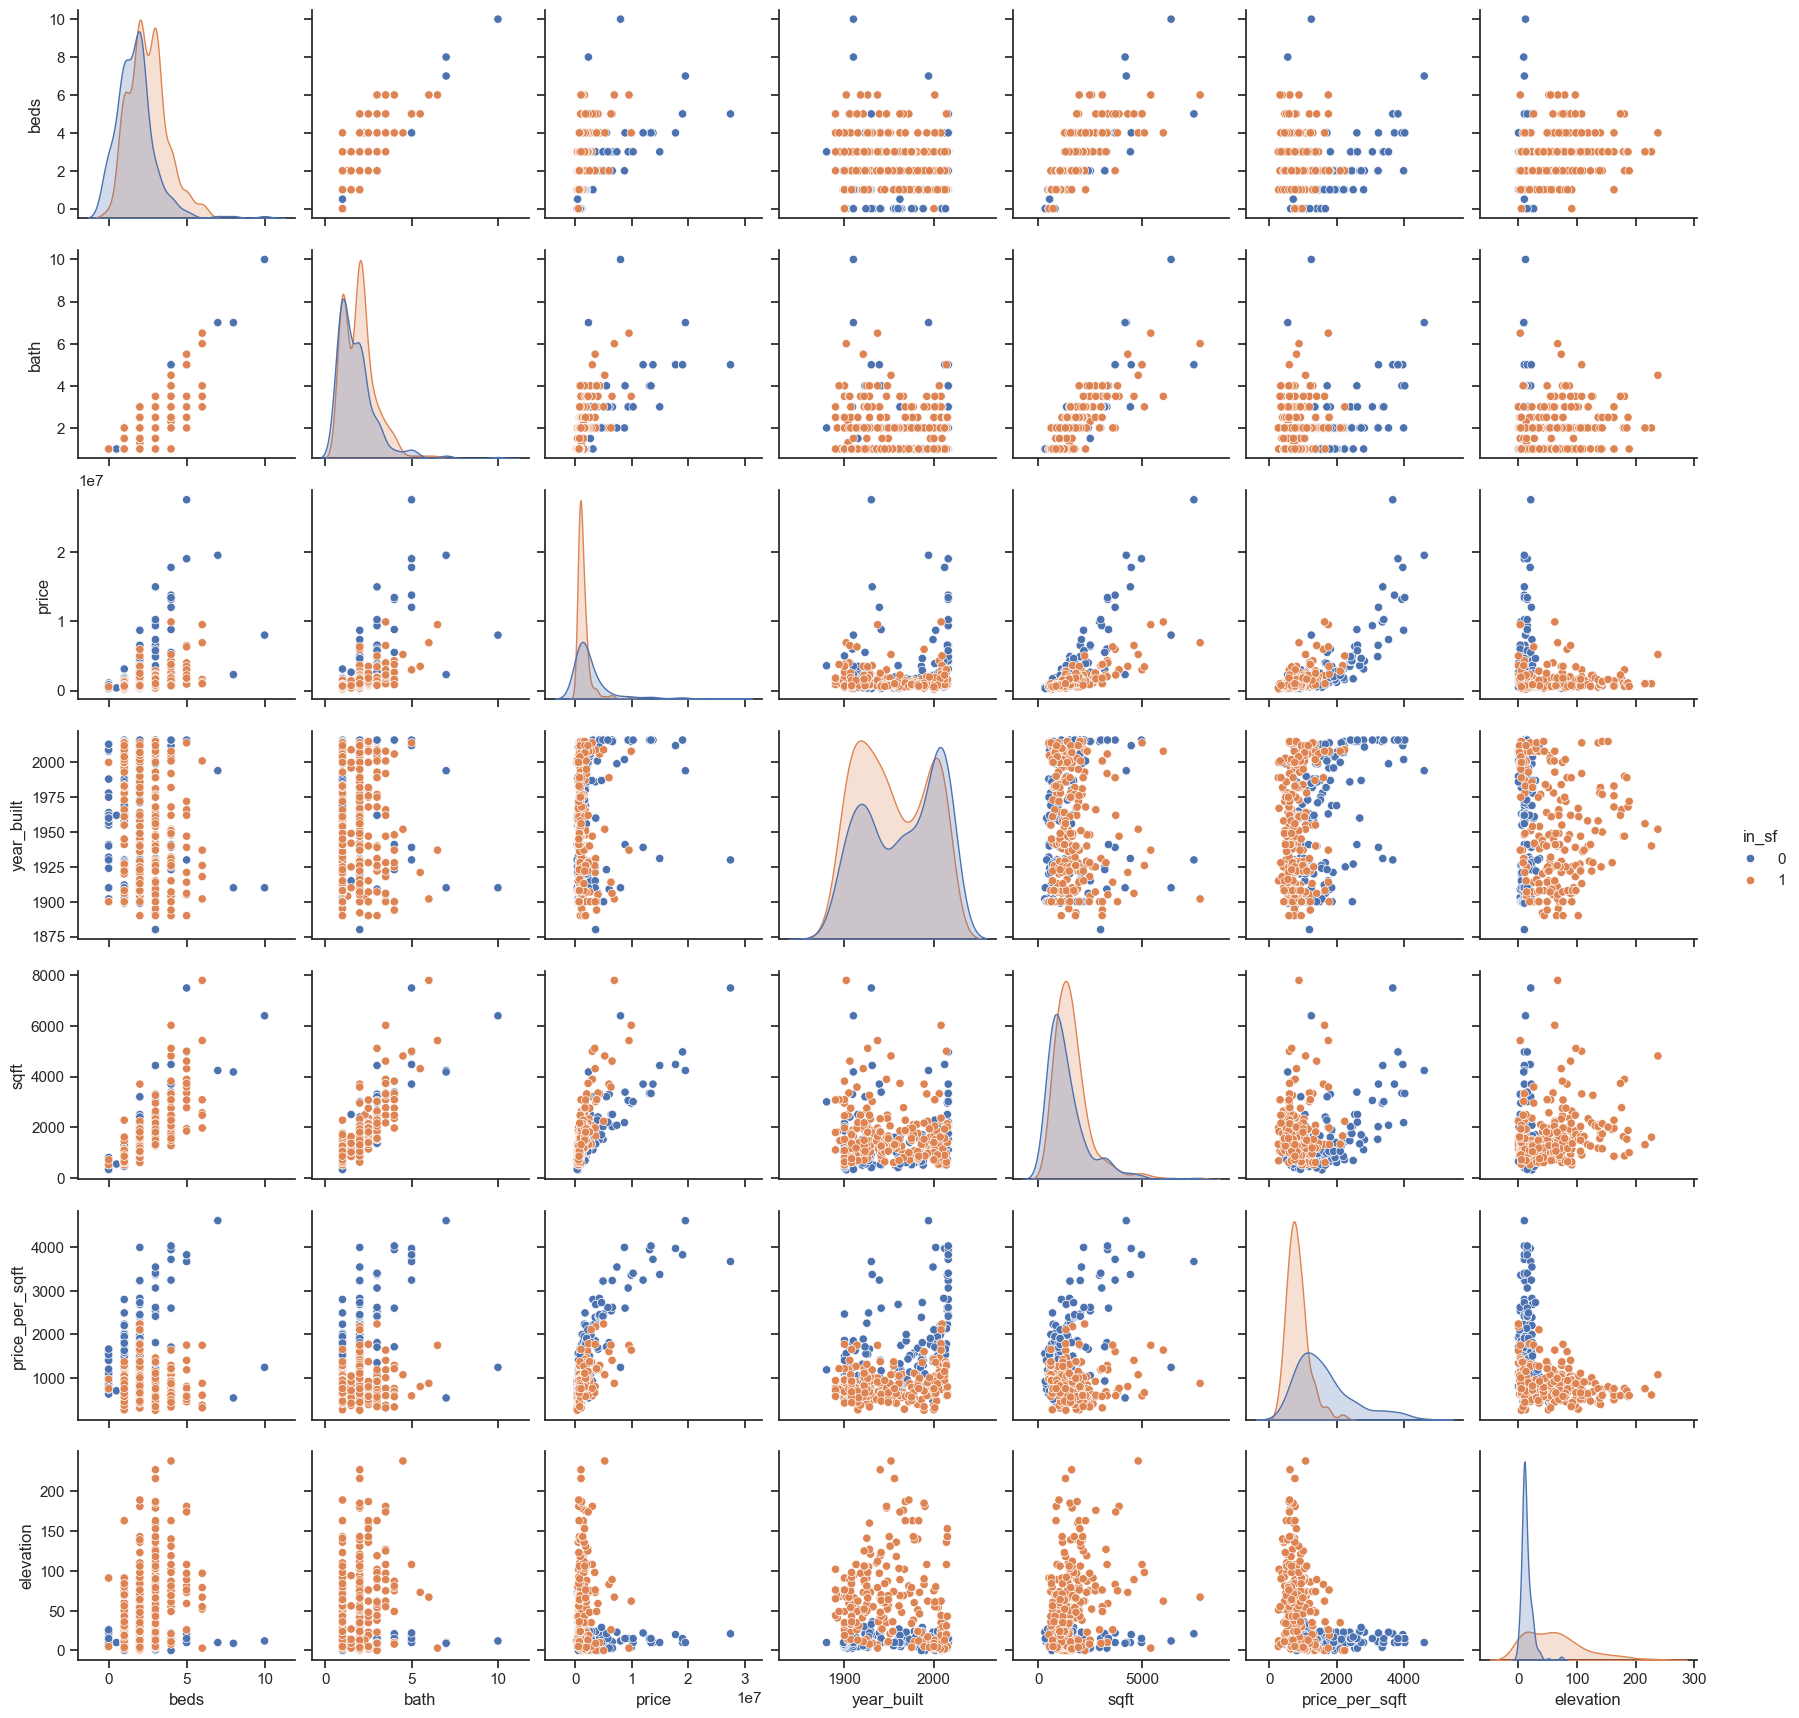

In [4]:
sns.set_theme(style="ticks")

sns.pairplot(data, hue="in_sf")

<Axes: xlabel='in_sf'>

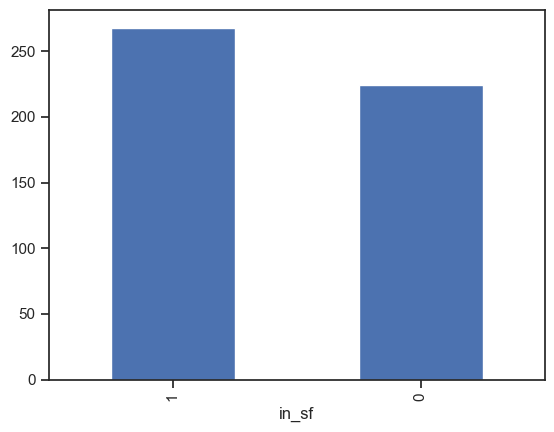

In [5]:
data.in_sf.value_counts().plot.bar()

In [6]:
y = data['in_sf']
X = data.drop('in_sf', axis=1)
print(X.shape, y.shape)

(492, 7) (492,)


### Simple split

Make sure you ONLY resample the training data not the testing data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

Install package imblearn with pip or conda

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

<Axes: xlabel='in_sf'>

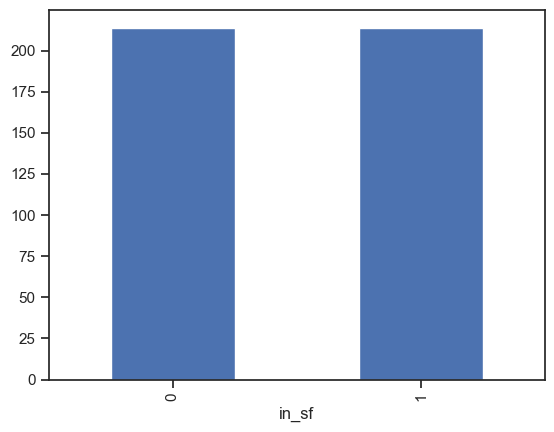

In [9]:
pd.Series(y_train_resampled).value_counts().plot.bar()

See [this resource](https://towardsdatascience.com/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a#:~:text=Class%20imbalance%20occurs%20when%20one,anomaly%20detection%2C%20and%20medical%20diagnosis.) for more about sampling techniques.

### K-fold validation

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.  
To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”.  
However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.  
A solution to this problem is a procedure called cross-validation (CV for short).  

<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400">
</div>


Source [scikit-cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).


Some different splitting techniques are interesting when you have experiments with subjects.  
Check scikit reference for more information.

In [10]:
import numpy as np
from sklearn.model_selection import KFold

X_example = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X_example):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

depth = []
for i in range(2,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train_resampled, y=y_train_resampled, cv=5)
    depth.append((i,scores.mean()))
    print((i,scores.mean()))

(2, np.float64(0.7942270861833105))
(3, np.float64(0.8362790697674418))
(4, np.float64(0.8597811217510261))
(5, np.float64(0.8784952120383037))
(6, np.float64(0.8901231190150479))
(7, np.float64(0.890095759233926))
(8, np.float64(0.8901231190150479))
(9, np.float64(0.890095759233926))
(10, np.float64(0.8878248974008208))
(11, np.float64(0.878467852257182))
(12, np.float64(0.8807934336525308))
(13, np.float64(0.8878248974008208))
(14, np.float64(0.8854719562243503))
(15, np.float64(0.8877701778385774))
(16, np.float64(0.8878248974008208))
(17, np.float64(0.8785225718194255))
(18, np.float64(0.8901504787961697))
(19, np.float64(0.8877975376196992))


### GridSearchCV: let scikit do the work

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=KFold(n_splits=5))
clf.fit(X=X_train_resampled, y=y_train_resampled)
tree_model = clf.best_estimator_
print(clf.best_score_, clf.best_params_) 

0.8854445964432284 {'max_depth': 5}


In [13]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=13)
dt.fit(X_train_resampled, y_train_resampled).score(X_test, y_test)

0.9292929292929293

[Text(0.6018258426966292, 0.95, 'x[6] <= 32.5\ngini = 0.5\nsamples = 428\nvalue = [214, 214]'),
 Text(0.3497191011235955, 0.85, 'x[5] <= 1077.5\ngini = 0.388\nsamples = 281\nvalue = [207, 74]'),
 Text(0.47577247191011235, 0.8999999999999999, 'True  '),
 Text(0.21910112359550563, 0.75, 'x[3] <= 1972.5\ngini = 0.5\nsamples = 103\nvalue = [50, 53]'),
 Text(0.12359550561797752, 0.65, 'x[5] <= 741.5\ngini = 0.382\nsamples = 66\nvalue = [49, 17]'),
 Text(0.06741573033707865, 0.55, 'x[6] <= 10.5\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(0.0449438202247191, 0.45, 'x[4] <= 2212.5\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.02247191011235955, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.06741573033707865, 0.35, 'x[3] <= 1918.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.0449438202247191, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.0898876404494382, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0898876404494382, 0.45, 'gini = 

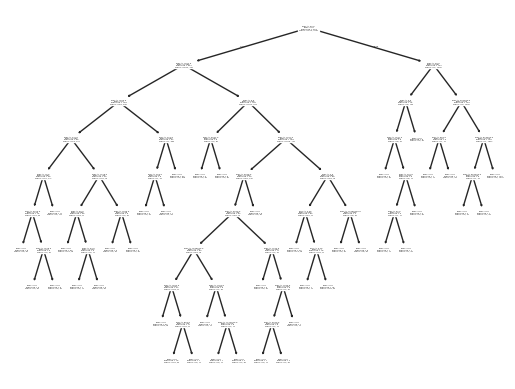

In [14]:
tree.plot_tree(dt)

## Creating a pipeline

Scikit pipelines allow you to write pre-processing steps as part of your model.  

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(max_depth=6) )])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train_resampled, y_train_resampled).score(X_test, y_test)

0.9292929292929293

Note: Decision trees are indiferent to feature scaling.

## Evaluating your classification: Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[43,  2],
       [ 5, 49]])

[Text(0, 0.5, 'SF'), Text(0, 1.5, 'NYC')]

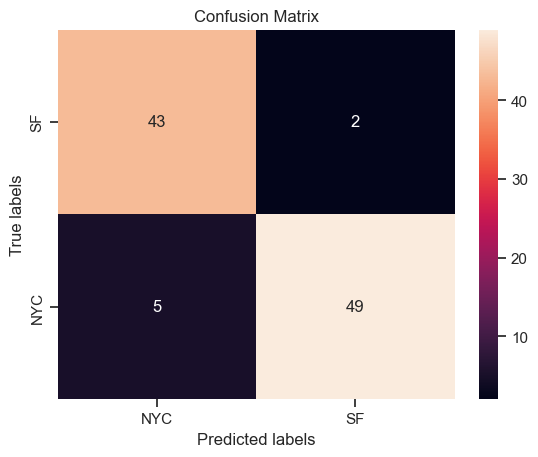

In [17]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NYC', 'SF'])
ax.yaxis.set_ticklabels(['SF', 'NYC'])

## Overfitting vs Underfitting: an interesting example  

Interactive resource:  
[r2d3 part 1](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)  
[r2d3 part 2](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)  


We will look at an example of overfitting a machine learning model to a training dataset.

First, let’s define a synthetic classification dataset.
We will use the make_classification() function to define a binary (two class) classification prediction problem with 10,000 examples (rows) and 20 input features (columns).

We will use a decision tree via the DecisionTreeClassifier and test different tree depths with the “max_depth” argument.

Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset.

Reminder:  
"If Bias vs Variance was the act of reading, it could be like Skimming a Text vs Memorizing a Text.  
We want our machine model to learn from the data it is exposed to, not to “have an idea of what it is about” or “memorize it word by word.”"  
Source: [understanding-bias-variance](https://www.kdnuggets.com/2020/09/understanding-bias-variance-trade-off-3-minutes.html#:~:text=Bias%20is%20the%20simplifying%20assumptions,change%2C%20given%20different%20training%20data.)

>1, train: 0.765, test: 0.772
>2, train: 0.807, test: 0.809
>3, train: 0.882, test: 0.883
>4, train: 0.904, test: 0.899
>5, train: 0.906, test: 0.896
>6, train: 0.924, test: 0.909
>7, train: 0.933, test: 0.912
>8, train: 0.942, test: 0.913
>9, train: 0.952, test: 0.916
>10, train: 0.963, test: 0.914
>11, train: 0.970, test: 0.912
>12, train: 0.975, test: 0.918
>13, train: 0.980, test: 0.914
>14, train: 0.985, test: 0.913
>15, train: 0.990, test: 0.909
>16, train: 0.992, test: 0.911
>17, train: 0.994, test: 0.909
>18, train: 0.996, test: 0.910
>19, train: 0.998, test: 0.913
>20, train: 0.999, test: 0.910


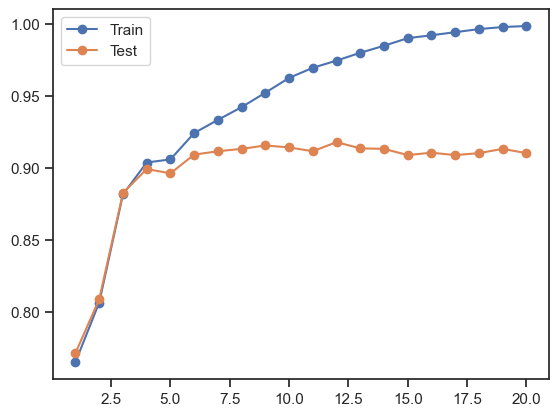

In [18]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Sometimes, we may perform an analysis of machine learning model behavior and be deceived by the results.

A good example of this is varying the number of neighbors for the k-nearest neighbors algorithms, which we can implement using the KNeighborsClassifier class and configure via the “n_neighbors” argument.

Let’s forget how KNN works for the moment.

We can perform the same analysis of the KNN algorithm as we did in the previous section for the decision tree and see if our model overfits for different configuration values. In this case, we will vary the number of neighbors from 1 to 50 to get more of the effect.

>1, train: 1.000, test: 0.919
>2, train: 0.964, test: 0.914
>3, train: 0.960, test: 0.933
>4, train: 0.956, test: 0.931
>5, train: 0.951, test: 0.937
>6, train: 0.950, test: 0.936
>7, train: 0.946, test: 0.936
>8, train: 0.948, test: 0.936
>9, train: 0.944, test: 0.936
>10, train: 0.944, test: 0.937
>11, train: 0.943, test: 0.936
>12, train: 0.943, test: 0.937
>13, train: 0.942, test: 0.937
>14, train: 0.941, test: 0.936
>15, train: 0.942, test: 0.936
>16, train: 0.940, test: 0.934
>17, train: 0.941, test: 0.933
>18, train: 0.939, test: 0.933
>19, train: 0.941, test: 0.934
>20, train: 0.940, test: 0.936
>21, train: 0.938, test: 0.933
>22, train: 0.938, test: 0.934
>23, train: 0.937, test: 0.934
>24, train: 0.937, test: 0.935
>25, train: 0.937, test: 0.934
>26, train: 0.936, test: 0.934
>27, train: 0.937, test: 0.935
>28, train: 0.935, test: 0.934
>29, train: 0.935, test: 0.932
>30, train: 0.935, test: 0.931
>31, train: 0.934, test: 0.932
>32, train: 0.934, test: 0.930
>33, train: 0.934

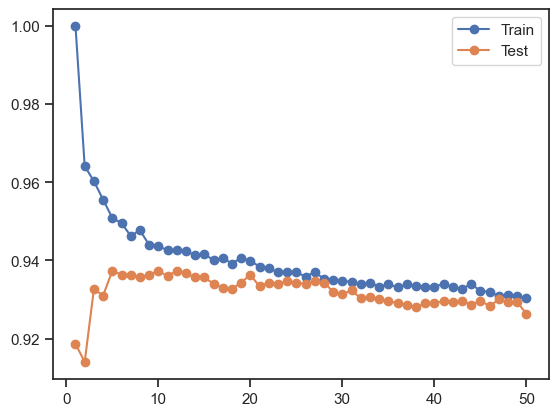

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()



- decision tree
- knn